<a href="https://colab.research.google.com/github/dangtrantrung/DecisionTree-RegressionTree/blob/master/DecisionTree%26RegressionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df=pd.read_csv("/content/data.csv")
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [4]:
df["Classification"].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [5]:
df["Classification"]=df["Classification"]-1
df["Classification"].value_counts()

1    64
0    52
Name: Classification, dtype: int64

In [9]:
y=df["Classification"].values.reshape(-1,1)
X=df.drop(columns=["Classification"])

In [10]:
print(y.shape)
print(X.shape)

(116, 1)
(116, 9)


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.1)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [30]:
my_tree=DecisionTreeClassifier(max_depth=2)
my_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [31]:
y_pred=my_tree.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[8 1]
 [0 3]]


              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.88      0.94      0.90        12
weighted avg       0.94      0.92      0.92        12



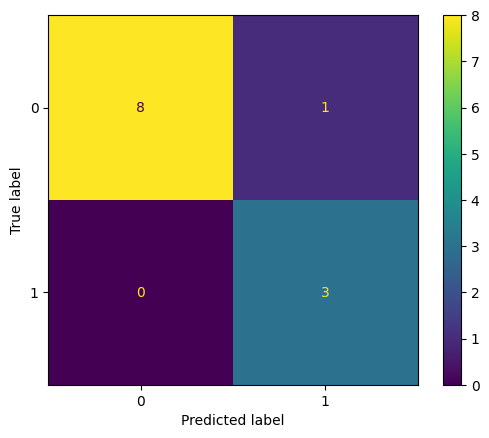

In [32]:
from sklearn.metrics import classification_report
# In ra du lieu
print(classification_report( y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=my_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=my_tree.classes_)
disp.plot()
plt.show()

In [33]:
# Load data
df=pd.read_csv("/content/datareg.csv")
df

,Product,Cost,Profit
0,'Asset Flip',100,1000
1,'Text Based',500,3000
2,'Visual Novel',1500,5000
3,'2D Pixel Art',3500,8000
4,'2D Vector Art',5000,6500
5,'Strategy',6000,7000
6,'First Person Shooter',8000,15000
7,'Simulator',9500,20000
8,'Racing',12000,21000
9,'RPG',14000,25000


In [35]:
X=df["Cost"].values.reshape(-1,1)
y=df["Profit"].values.reshape(-1,1)

In [37]:
from sklearn.tree import DecisionTreeRegressor
my_tree=DecisionTreeRegressor()
my_tree.fit(X,y)


DecisionTreeRegressor()

In [38]:
X_test=[[4500]]
y_pred=my_tree.predict(X_test)
print(y_pred)

[6500.]


[Text(0.6805555555555556, 0.9285714285714286, 'Cost <= 20750.0\nsquared_error = 440302295.918\nsamples = 14\nvalue = 21464.286'),
 Text(0.4722222222222222, 0.7857142857142857, 'Cost <= 7000.0\nsquared_error = 95352430.556\nsamples = 12\nvalue = 14041.667'),
 Text(0.2222222222222222, 0.6428571428571429, 'Cost <= 1000.0\nsquared_error = 5868055.556\nsamples = 6\nvalue = 5083.333'),
 Text(0.1111111111111111, 0.5, 'Cost <= 300.0\nsquared_error = 1000000.0\nsamples = 2\nvalue = 2000.0'),
 Text(0.05555555555555555, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 1000.0'),
 Text(0.16666666666666666, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 3000.0'),
 Text(0.3333333333333333, 0.5, 'Cost <= 2500.0\nsquared_error = 1171875.0\nsamples = 4\nvalue = 6625.0'),
 Text(0.2777777777777778, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 5000.0'),
 Text(0.3888888888888889, 0.35714285714285715, 'Cost <= 4250.0\nsquared_error = 388888.889\nsamples = 3\

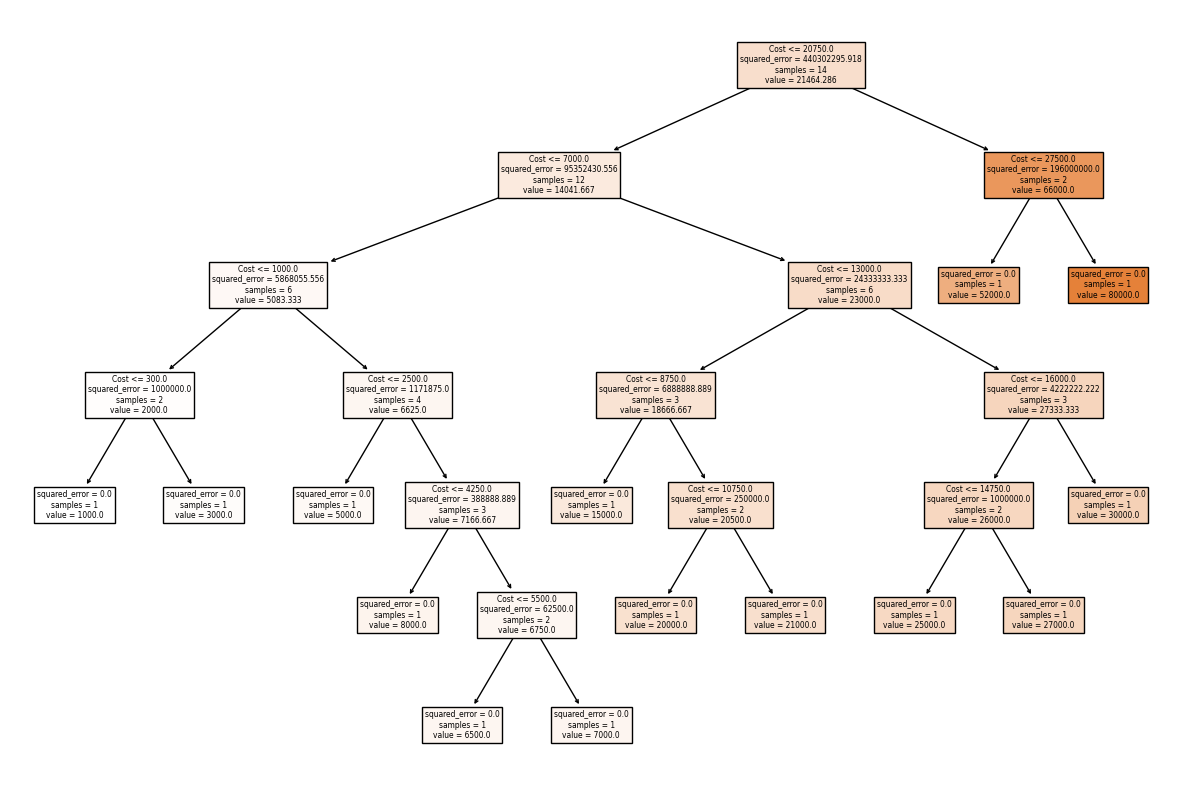

In [44]:
from sklearn import tree
fig=plt.figure(figsize=(15,10))
tree.plot_tree(my_tree,feature_names=["Cost"],class_names=["Profit"],filled=True)